In [2]:
import pandas as pd
import numpy as np
import os
from pandasql import sqldf
import matplotlib.pyplot as plt


In [3]:
folder_path = "C:/Users/Alan/Desktop/DRAFT ORDER PREDICTION/data_team"

files_and_dirs = os.listdir(folder_path)

files = [f for f in files_and_dirs if os.path.isfile(os.path.join(folder_path, f))]

print(files)  

['cbb13.csv', 'cbb14.csv', 'cbb15.csv', 'cbb16.csv', 'cbb17.csv', 'cbb18.csv', 'cbb19.csv', 'cbb20.csv', 'cbb21.csv', 'cbb22.csv', 'cbb23.csv', 'cbb24.csv']


In [4]:
decade_data = {f"{i}" : pd.read_csv(f"data_team/{i}") for i in files}

In [5]:
for i in decade_data:
    decade_data[i]['Year'] = f"20{i[3:5]}"

decade_data['cbb24.csv'].rename(columns={'EFG%': 'EFG_O', 'EFGD%': 'EFG_D'}, inplace=True)
decade_data['cbb22.csv'].rename(columns={'EFGD_D': 'EFG_D'}, inplace=True)



In [6]:
final_df  = pd.DataFrame()

In [7]:
for i in decade_data:
    final_df = pd.concat([decade_data[i], final_df])

In [8]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4238 entries, 0 to 346
Data columns (total 26 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  362 non-null    float64
 1   RK          715 non-null    float64
 2   TEAM        4238 non-null   object 
 3   CONF        4238 non-null   object 
 4   G           4238 non-null   int64  
 5   W           4238 non-null   int64  
 6   ADJOE       4238 non-null   float64
 7   ADJDE       4238 non-null   float64
 8   BARTHAG     4238 non-null   float64
 9   EFG_O       4238 non-null   float64
 10  EFG_D       4238 non-null   float64
 11  TOR         4238 non-null   float64
 12  TORD        4238 non-null   float64
 13  ORB         4238 non-null   float64
 14  DRB         4238 non-null   float64
 15  FTR         4238 non-null   float64
 16  FTRD        4238 non-null   float64
 17  2P_O        4238 non-null   float64
 18  2P_D        4238 non-null   float64
 19  3P_O        4238 non-null   float

In [9]:
final_df

,Unnamed: 0,RK,TEAM,CONF,G,W,ADJOE,ADJDE,BARTHAG,EFG_O,...,FTRD,2P_O,2P_D,3P_O,3P_D,ADJ_T,WAB,SEED,POSTSEASON,Year
0,0.0,1.0,Houston,B12,34,30,119.2,85.5,0.9785,49.7,...,39.0,48.4,43.4,34.7,30.0,63.3,10.6,1.0,S16,2024
1,1.0,2.0,Connecticut,BE,34,31,127.1,93.6,0.9712,57.1,...,32.5,58.5,43.7,36.7,31.9,64.6,11.3,1.0,Champions,2024
2,2.0,3.0,Purdue,B10,33,29,126.2,94.7,0.9644,56.0,...,23.0,53.2,48.1,40.8,31.4,67.6,11.0,1.0,2ND,2024
3,3.0,4.0,Iowa St.,B12,34,27,113.6,86.5,0.9583,51.9,...,35.2,51.7,46.9,34.9,31.5,67.6,6.9,2.0,S16,2024
4,4.0,5.0,Auburn,SEC,34,27,120.7,92.1,0.9573,54.1,...,41.0,54.9,42.8,35.2,29.8,69.8,5.5,4.0,R64,2024
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
342,NaN,NaN,Prairie View A&M,SWAC,31,12,87.1,103.5,0.1209,41.3,...,43.7,42.0,46.9,26.0,31.3,67.0,-15.1,NaN,NaN,2013
343,NaN,NaN,Buffalo,MAC,32,12,102.5,103.4,0.4761,50.4,...,36.8,50.0,46.1,34.2,33.2,65.4,-13.6,NaN,NaN,2013
344,NaN,NaN,Louisiana Lafayette,SB,32,12,98.4,105.3,0.3135,48.6,...,43.3,46.9,47.2,34.5,34.9,70.2,-13.9,NaN,NaN,2013
345,NaN,NaN,Bethune Cookman,MEAC,32,12,96.0,107.5,0.2134,45.9,...,46.8,45.6,50.9,31.0,34.1,65.9,-15.0,NaN,NaN,2013


In [10]:
query = """SELECT Team, COUNT(*) as 'FINAL_4_appearance' 
FROM final_df 
WHERE POSTSEASON = 'F4' OR POSTSEASON = '2ND' OR POSTSEASON = 'Champions' 
GROUP BY 1 

ORDER BY 2 DESC """

result = sqldf(query, locals())

print(result) 

                  TEAM  FINAL_4_appearance
0            Villanova                   3
1       North Carolina                   3
2          Connecticut                   3
3            Wisconsin                   2
4             Syracuse                   2
5         Michigan St.                   2
6             Michigan                   2
7             Kentucky                   2
8               Kansas                   2
9              Gonzaga                   2
10                Duke                   2
11         Wichita St.                   1
12            Virginia                   1
13                UCLA                   1
14          Texas Tech                   1
15      South Carolina                   1
16       San Diego St.                   1
17              Purdue                   1
18              Oregon                   1
19            Oklahoma                   1
20  North Carolina St.                   1
21            Miami FL                   1
22      Loy

In [11]:

query = """SELECT year, AVG([3P_O]) AS 'Average three-point percentage'
FROM final_df
WHERE [3P_O] IS NOT NULL
GROUP BY year
ORDER BY year ASC"""

result = sqldf(query, locals())

print(result) 

    Year  Average three-point percentage
0   2013                       33.724207
1   2014                       34.294302
2   2015                       34.165527
3   2016                       34.537892
4   2017                       34.860969
5   2018                       34.966952
6   2019                       34.287819
7   2020                       33.188102
8   2021                       33.663689
9   2022                       33.480447
10  2023                       33.886501
11  2024                       33.708564


In [12]:
three_ptr_by_year = result


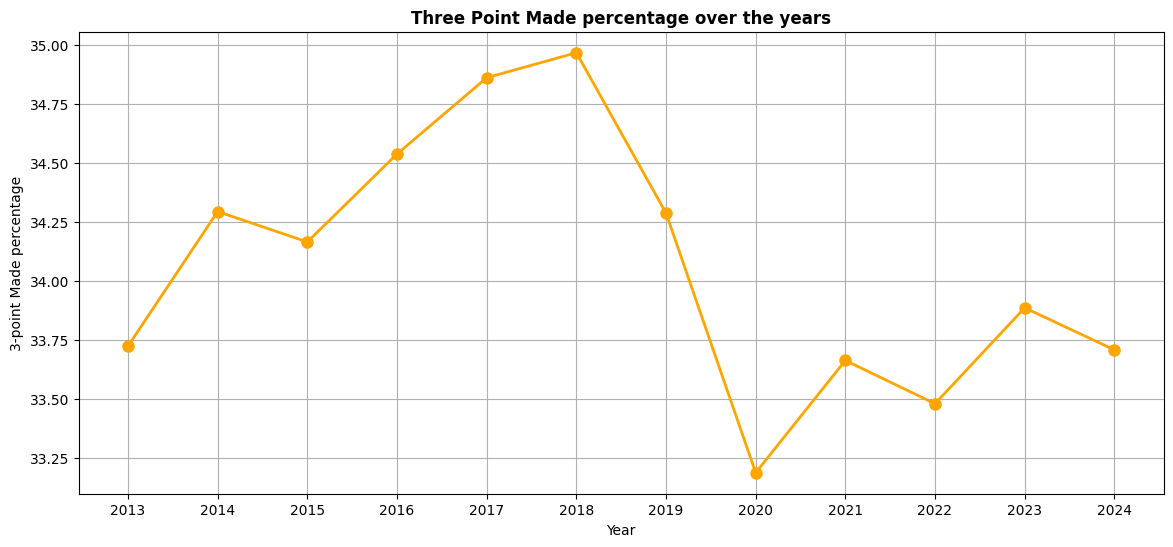

In [13]:
plt.figure(figsize=(14, 6))  
plt.plot(three_ptr_by_year['Year'], three_ptr_by_year['Average three-point percentage'], color='orange', marker='o', markersize=8, linestyle='-', linewidth=2)
plt.title("")
plt.title('Three Point Made percentage over the years', fontweight='bold')

plt.xlabel("Year")
plt.ylabel("3-point Made percentage")
plt.grid()
plt.show()

In [14]:
three_ptr_attempt = pd.read_csv('3pta.csv')

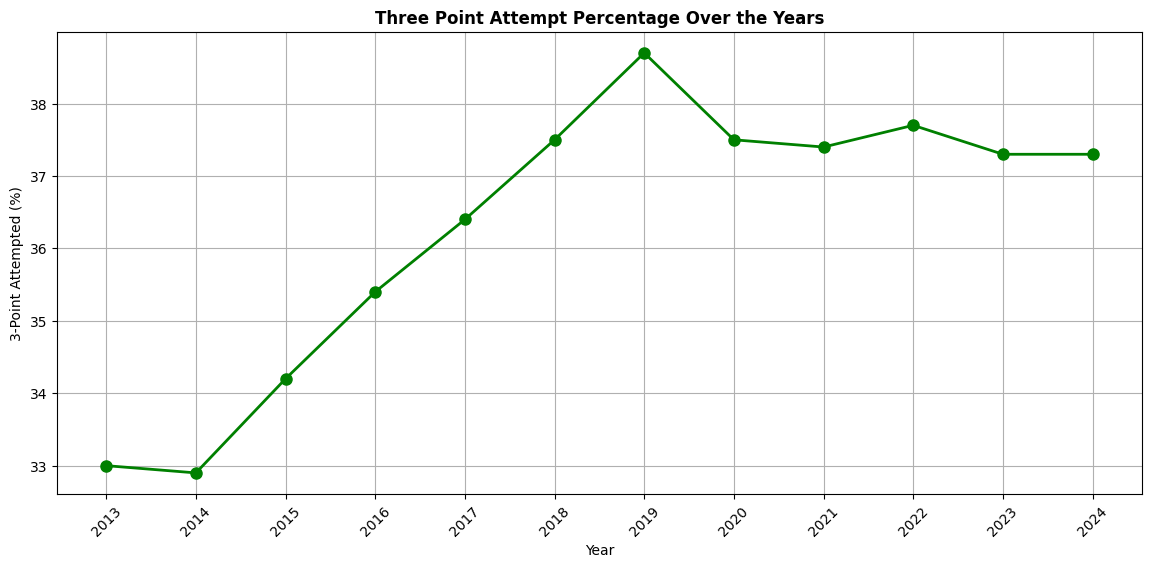

In [15]:
import plotly.express as px


plt.figure(figsize=(14, 6))  
plt.plot(three_ptr_attempt['Year'], three_ptr_attempt['3PAT(%)'], 
         color='green', marker='o', markersize=8, linestyle='-', linewidth=2)
plt.xticks(three_ptr_attempt['Year'], rotation=45) 

plt.title("Three Point Attempt Percentage Over the Years", fontweight = 'bold')
plt.xlabel("Year")
plt.ylabel("3-Point Attempted (%)")
plt.grid()
plt.show()


In [16]:

query = """
SELECT CONF, COUNT(*) FROM final_df
WHERE POSTSEASON IS NOT NULL OR POSTSEASON != 'NA' OR POSTSEASON != 'N/A' OR POSTSEASON != "R68"
GROUP BY 1 ORDER BY 2 DESC;

"""
result = sqldf(query, locals())

print(result.head(10)) 
conf_dis = result

   CONF  COUNT(*)
0   B10        78
1   B12        73
2   ACC        70
3   SEC        62
4    BE        58
5   P12        48
6   MWC        32
7   A10        32
8  Amer        27
9   WCC        21


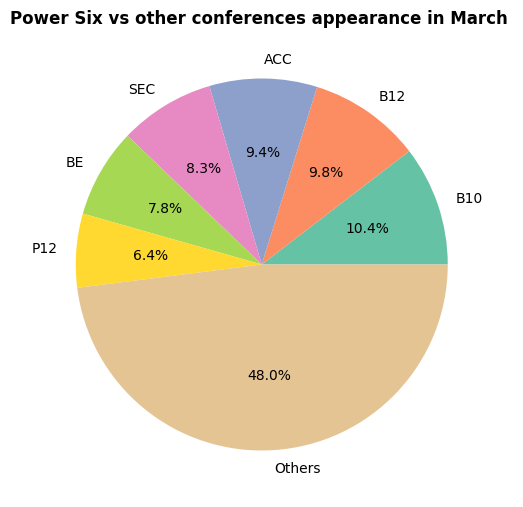

In [17]:
import seaborn as sns
colors = sns.color_palette("Set2") 

top_6 = conf_dis.head(6)
others = conf_dis.iloc[6:]
labels = top_6["CONF"].tolist() + ["Others"]
sizes = top_6["COUNT(*)"].tolist() + [others["COUNT(*)"].sum()]
plt.figure(figsize=(6, 8))
plt.pie(sizes, labels=labels, autopct="%1.1f%%",colors=colors)
plt.title("Power Six vs other conferences appearance in March ", fontweight = 'bold')
plt.show()

In [23]:

query = """
SELECT Year,  AVG(SEED) FROM final_df
WHERE POSTSEASON = 'F4' OR POSTSEASON = '2ND' OR  POSTSEASON = 'Champions'
GROUP BY 1 ORDER BY 1 ASC;

"""
result = sqldf(query, locals())


result

,Year,AVG(SEED)
0,2013,4.50
1,2014,4.50
2,2015,2.50
3,2016,3.75
4,2017,3.00
5,2018,4.00
6,2019,2.75
7,2021,3.75
8,2022,3.25
9,2023,5.75


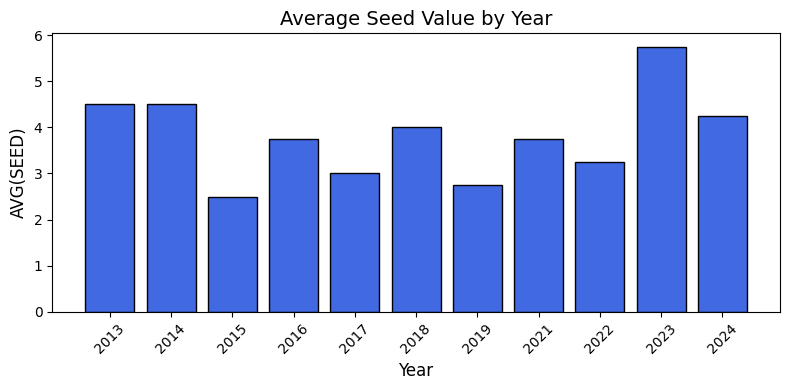

In [30]:
plt.figure(figsize=(8, 4))
plt.bar(result['Year'], result['AVG(SEED)'], color='royalblue', edgecolor='black')

# Add labels and title
plt.xlabel('Year', fontsize=12)
plt.ylabel('AVG(SEED)', fontsize=12)
plt.title('Average Seed Value by Year', fontsize=14)
plt.xticks(result['Year'], rotation=45)
plt.tight_layout()

# Show the plot
plt.show()